In [1]:
import pandas as pd
import numpy as np

import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn
assert sklearn.__version__ >= "0.20"

data=pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/airline_passenger_satisfaction.csv')
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Loyalty
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,1
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,4,5,5,3,5,2,5,5,Satisfied,4
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,5,5,3,4,3,3,Satisfied,4
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,4,4,5,2,5,5,Satisfied,4
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,4,5,4,3,3,3,3,Satisfied,4


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [3]:
data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Loyalty
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114,3.068278
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025,0.993292
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000


In [4]:
data['Class'].value_counts()

Class
Business        62160
Economy         58309
Economy Plus     9411
Name: count, dtype: int64

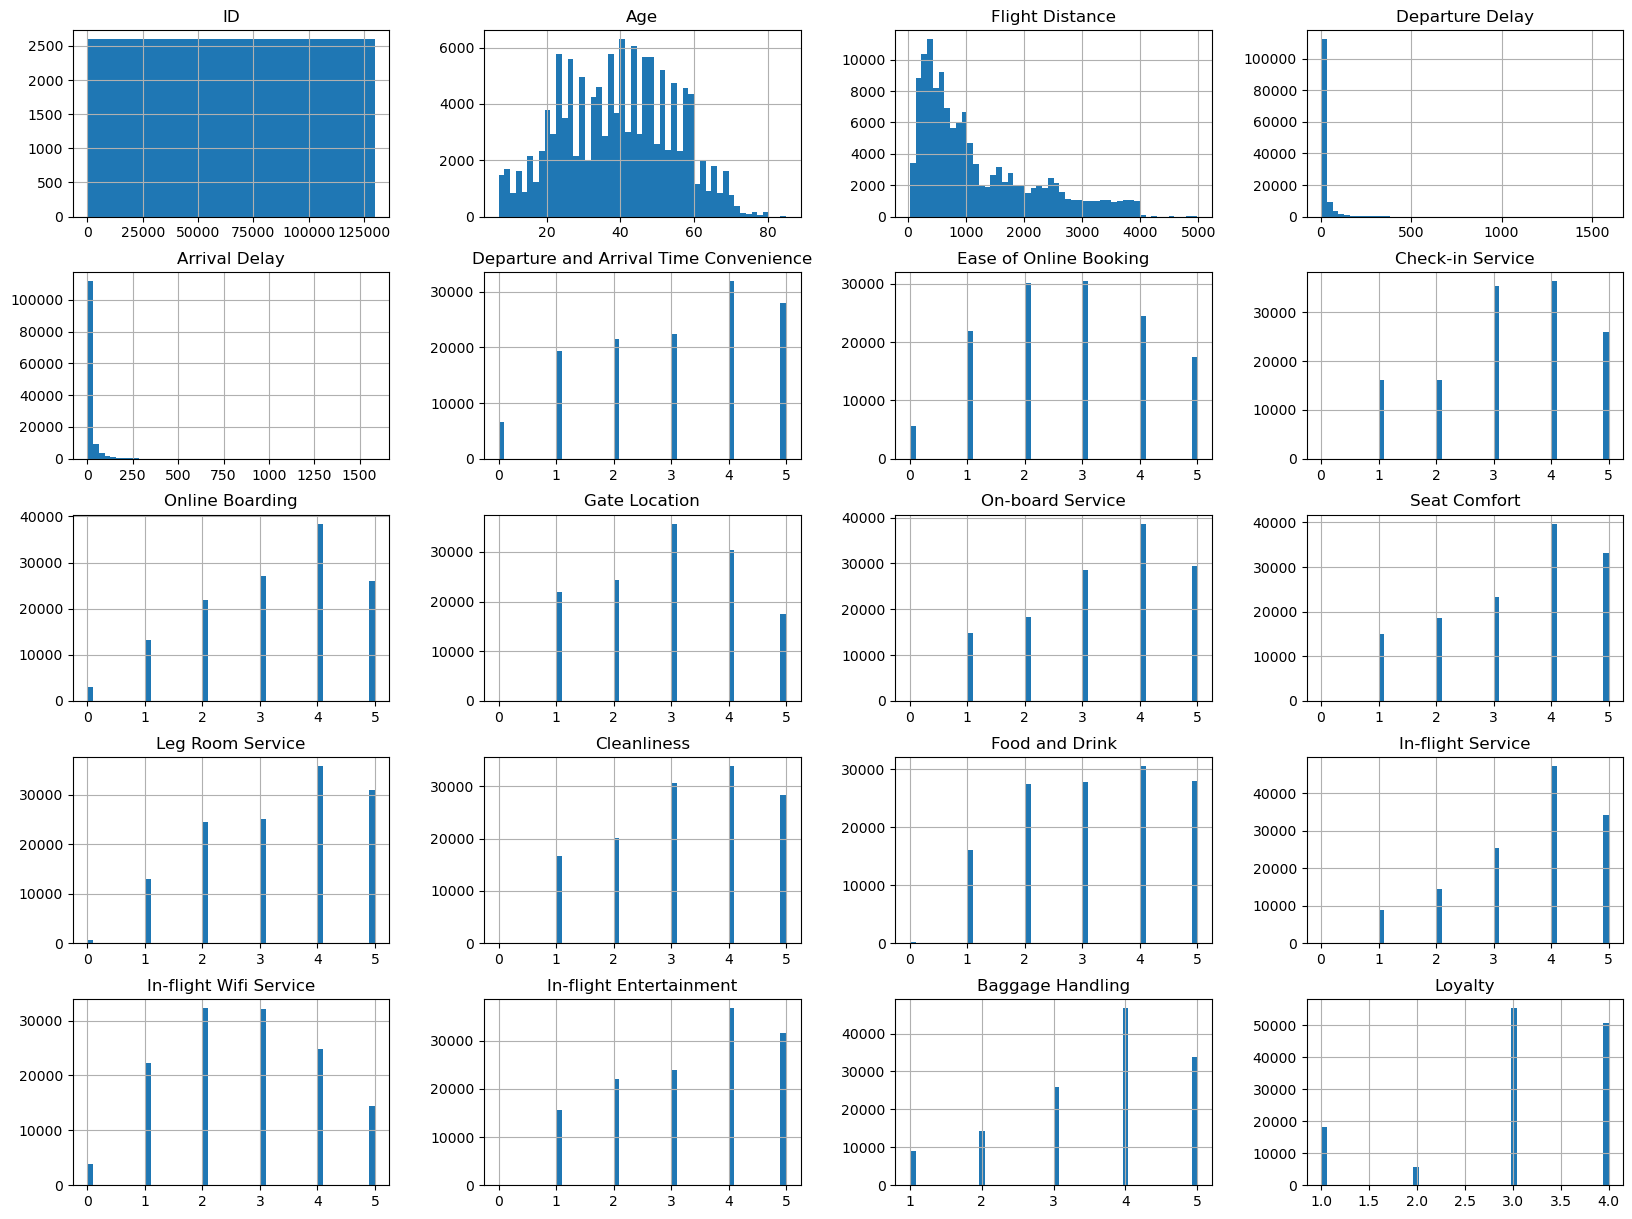

In [5]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
# Drop the ID column
data = data.drop('ID', axis=1)

# Drop Customer Type and Sataisfaction attributes as Loyalty is derived from these two attributes and Satisfaction is the original attribute
data = data.drop('Customer Type', axis=1)
data = data.drop('Satisfaction', axis=1)
data['Loyalty'].value_counts()

Loyalty
3    55372
4    50728
1    18080
2     5700
Name: count, dtype: int64

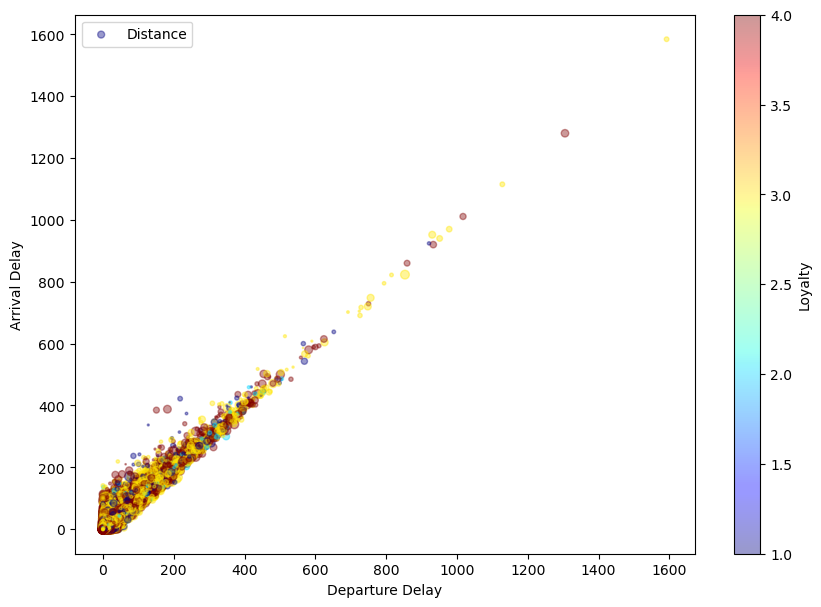

In [7]:
data.plot(kind="scatter", x="Departure Delay", y="Arrival Delay", alpha=0.4,
    s=data["Flight Distance"]/100, label="Distance", figsize=(10,7),
    c="Loyalty", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [8]:
import seaborn as sns

# Check for unique values in categorical columns to understand distributions
categorical_columns = ['Gender',  'Type of Travel', 'Class']
for col in categorical_columns:
    print(f"{col} unique values:\n", data[col].value_counts(), "\n")


Gender unique values:
 Gender
Female    65899
Male      63981
Name: count, dtype: int64 

Type of Travel unique values:
 Type of Travel
Business    89693
Personal    40187
Name: count, dtype: int64 

Class unique values:
 Class
Business        62160
Economy         58309
Economy Plus     9411
Name: count, dtype: int64 



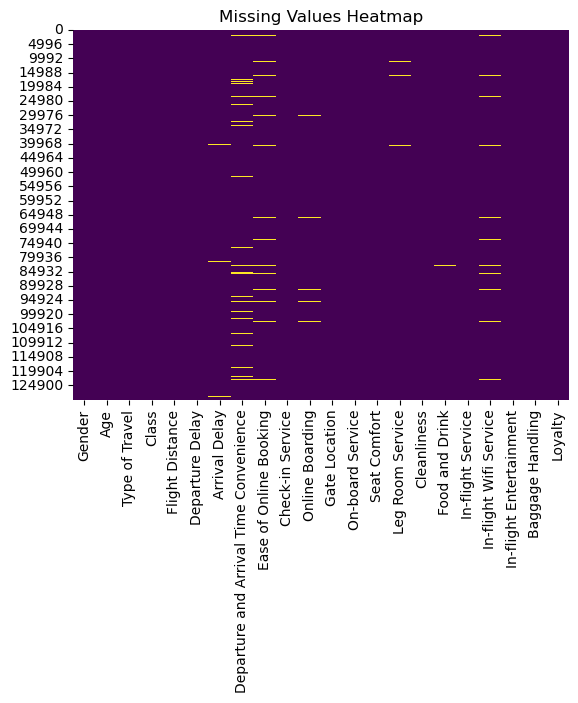

In [9]:
# Replace '0' values with NaN in satisfaction-related columns, as 0 indicates a null/missing survey response.
survey_columns = [
     'Departure and Arrival Time Convenience', 
    'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 
    'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 
    'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 
    'In-flight Entertainment', 'Baggage Handling'
]
data[survey_columns] = data[survey_columns].replace(0, np.nan)

# Visualize missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [10]:
# Check percentage of missing values
missing_percentage = data.isnull().mean() * 100
print("Percentage of missing values:\n", missing_percentage)

# Impute missing values based on context: 
# - Median for numeric columns
# - Mode for categorical columns
data = data.dropna(subset=survey_columns)

# Impute missing values: Median for numeric columns, mode for categorical columns
for column in ['Departure Delay', 'Arrival Delay']:
    if data[column].isnull().sum() > 0:
        data[column] = data[column].fillna(data[column].median())

print("Null values are corrected \n")

Percentage of missing values:
 Gender                                    0.000000
Age                                       0.000000
Type of Travel                            0.000000
Class                                     0.000000
Flight Distance                           0.000000
Departure Delay                           0.000000
Arrival Delay                             0.302587
Departure and Arrival Time Convenience    5.143979
Ease of Online Booking                    4.374808
Check-in Service                          0.000770
Online Boarding                           2.371420
Gate Location                             0.000770
On-board Service                          0.003850
Seat Comfort                              0.000770
Leg Room Service                          0.460425
Cleanliness                               0.010779
Food and Drink                            0.101632
In-flight Service                         0.003850
In-flight Wifi Service                    3.015091


/var/folders/gx/9cn8k5x52gq_wpn2s2w4j2340000gn/T/ipykernel_19551/883713548.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].fillna(data[column].median())


In [11]:
# Check the percentage of missing values after correction
missing_percentage = data.isnull().mean() * 100
print("Percentage of missing values:\n", missing_percentage)

data['Loyalty'].value_counts()

Percentage of missing values:
 Gender                                    0.0
Age                                       0.0
Type of Travel                            0.0
Class                                     0.0
Flight Distance                           0.0
Departure Delay                           0.0
Arrival Delay                             0.0
Departure and Arrival Time Convenience    0.0
Ease of Online Booking                    0.0
Check-in Service                          0.0
Online Boarding                           0.0
Gate Location                             0.0
On-board Service                          0.0
Seat Comfort                              0.0
Leg Room Service                          0.0
Cleanliness                               0.0
Food and Drink                            0.0
In-flight Service                         0.0
In-flight Wifi Service                    0.0
In-flight Entertainment                   0.0
Baggage Handling                          0.0
Loy

Loyalty
3    52808
4    47525
1    15729
2     3505
Name: count, dtype: int64

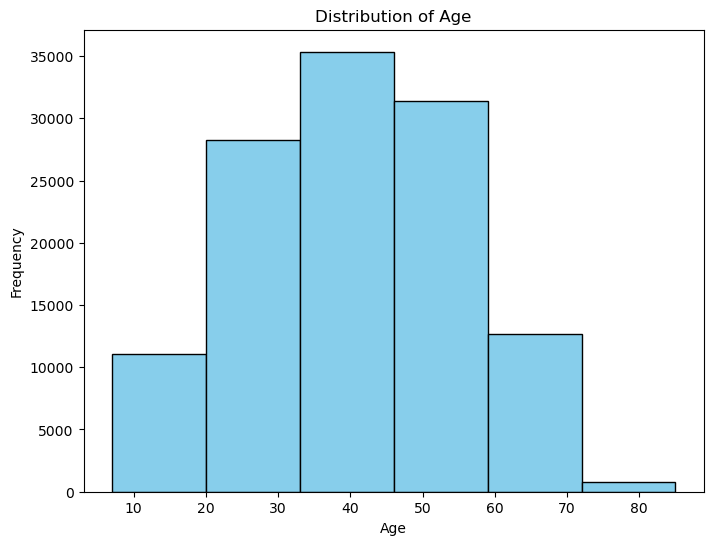

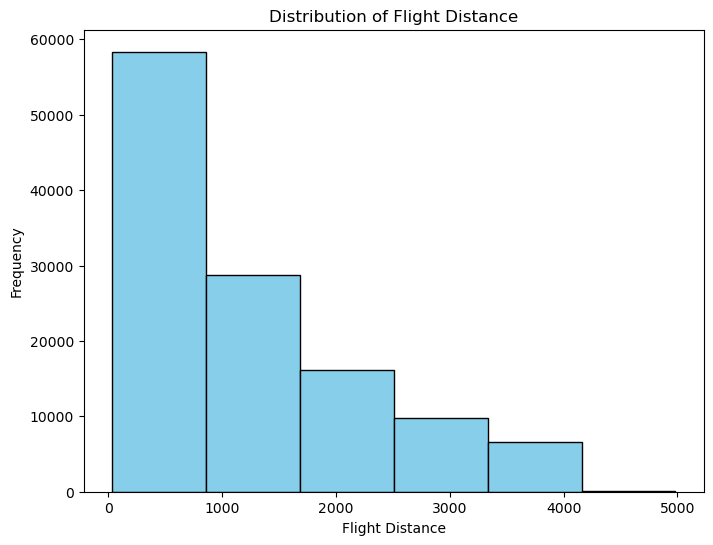

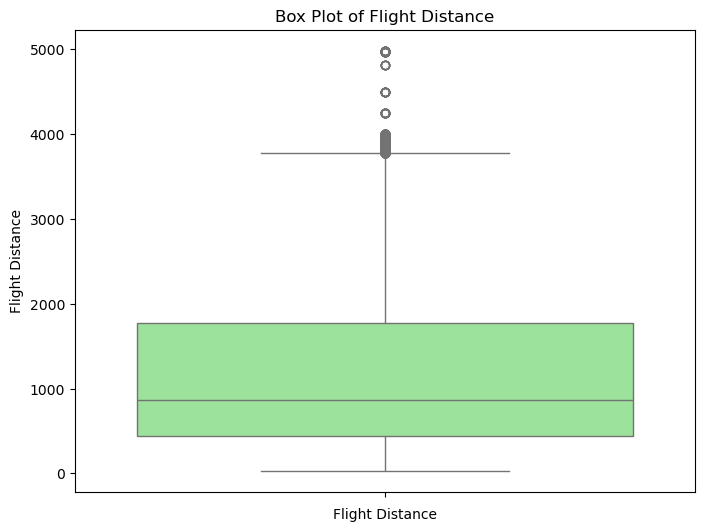

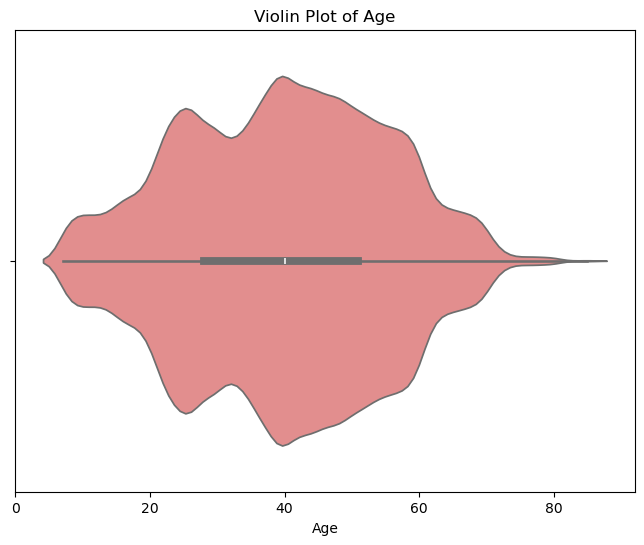

In [12]:

# Visualizing the distribution of a continuous feature, e.g., 'Age'
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=6, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualizing the distribution of a continuous feature, e.g., 'Age'
plt.figure(figsize=(8, 6))
plt.hist(data['Flight Distance'], bins=6, color='skyblue', edgecolor='black')
plt.title('Distribution of Flight Distance')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
plt.show()

# Box plot of a feature 'Flight Distance'  Box plots can reveal outliers and distribution spread. They are helpful for understanding how data values are dispersed across quartiles.
plt.figure(figsize=(8, 6))
sns.boxplot(data['Flight Distance'], color='lightgreen')
plt.title('Box Plot of Flight Distance')
plt.xlabel('Flight Distance')
plt.show()


# Violin plot for Age Violin plots combine a box plot with a kernel density plot, which is helpful for observing the distribution, especially if it’s multimodal (has multiple peaks).
plt.figure(figsize=(8, 6))
sns.violinplot(x=data['Age'], color='lightcoral')
plt.title('Violin Plot of Age')
plt.xlabel('Age')
plt.show()





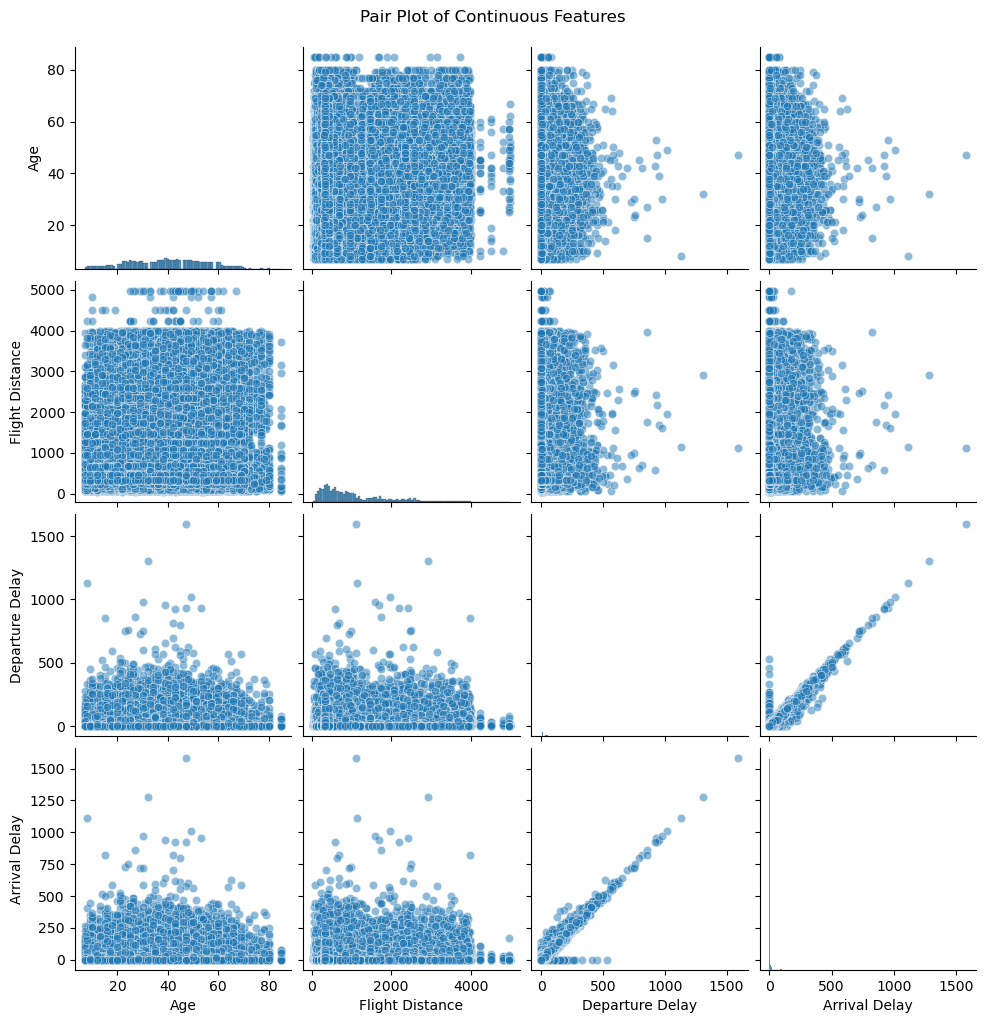

In [13]:
# Pair Plot  If you want to examine multiple features before splitting, a pair plot is a good choice as it shows pairwise relationships and distribution for each feature.


# Subset of continuous variables for pair plot
continuous_features = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']

sns.pairplot(data[continuous_features], diag_kind='hist', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Continuous Features', y=1.02)
plt.show()

In [14]:
#Encoding data 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


# One-hot encoding - Not going with this as its not helping in correlation and ANN
#data_encoded_1 = pd.get_dummies(data, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction'])
# Encoding for all the category columns to ensure that all numbers taken up for maching learning

data.loc[:, categorical_columns] = data[categorical_columns].apply(le.fit_transform)
#categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']


data.head()

,Gender,Age,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Loyalty
0,1,48,0,0,821,2,5.0,3.0,3.0,4.0,...,3.0,5.0,2.0,5.0,5.0,5.0,3.0,5.0,5,1
1,0,35,0,0,821,26,39.0,2.0,2.0,3.0,...,5.0,4.0,5.0,5.0,3.0,5.0,2.0,5.0,5,4
2,1,41,0,0,853,0,0.0,4.0,4.0,4.0,...,3.0,5.0,3.0,5.0,5.0,3.0,4.0,3.0,3,4
3,1,50,0,0,1905,0,0.0,2.0,2.0,3.0,...,5.0,5.0,5.0,4.0,4.0,5.0,2.0,5.0,5,4
4,0,49,0,0,3470,0,1.0,3.0,3.0,3.0,...,3.0,4.0,4.0,5.0,4.0,3.0,3.0,3.0,3,4


In [15]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Example Dataset (Assume X and y are already defined)
X = data.drop(columns=['Loyalty'])
y = data['Loyalty']

# Fit a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to show feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort by importance and select top 10
top_features = importance_df.sort_values(by='Importance', ascending=False).head(10)
print(top_features)

# Get the dataset with only top 10 features
X_top10 = X[top_features['Feature']]

                    Feature  Importance
2            Type of Travel    0.181033
10          Online Boarding    0.119252
18   In-flight Wifi Service    0.084545
3                     Class    0.068377
19  In-flight Entertainment    0.062273
1                       Age    0.055344
4           Flight Distance    0.047250
13             Seat Comfort    0.045205
8    Ease of Online Booking    0.039340
11            Gate Location    0.036153


In [16]:
#Binning logic applied to bin attributes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


# Kmean of age
ages = data['Age'].values.reshape(-1, 1)  # Reshaping for KMeans, which expects a 2D array
# Applying KMeans with  clusters
kmeans = KMeans(n_clusters=10, random_state=0)
data['Age'] = kmeans.fit_predict(ages)


# Get the cluster centers (these represent the bin centroids)
#centroids = np.sort(kmeans.cluster_centers_.flatten())
#print("Cluster Centers (Bin Centers):", centroids)

# plt.figure(figsize=(10, 6))
# sns.histplot(data=data, x='Age', hue='Age_bins', palette='viridis', bins=30, kde=True)
# plt.title('Age Distribution by K-means Bins')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.legend(title='Age Bins')
# plt.show()

flightDist = data['Flight Distance'].values.reshape(-1, 1)  # Reshaping for KMeans, which expects a 2D array
# Applying KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
data['Flight Distance'] = kmeans.fit_predict(flightDist)

departDelay = data['Departure Delay'].values.reshape(-1, 1)  # Reshaping for KMeans, which expects a 2D array
# Applying KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
data['Departure Delay'] = kmeans.fit_predict(departDelay)

arrivDelay = data['Arrival Delay'].values.reshape(-1, 1)  # Reshaping for KMeans, which expects a 2D array
# Applying KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
data['Arrival Delay'] = kmeans.fit_predict(arrivDelay)



Data types of each column:
 Gender                                     object
Age                                         int32
Type of Travel                             object
Class                                      object
Flight Distance                             int32
Departure Delay                             int32
Arrival Delay                               int32
Departure and Arrival Time Convenience    float64
Ease of Online Booking                    float64
Check-in Service                          float64
Online Boarding                           float64
Gate Location                             float64
On-board Service                          float64
Seat Comfort                              float64
Leg Room Service                          float64
Cleanliness                               float64
Food and Drink                            float64
In-flight Service                         float64
In-flight Wifi Service                    float64
In-flight Entertainmen

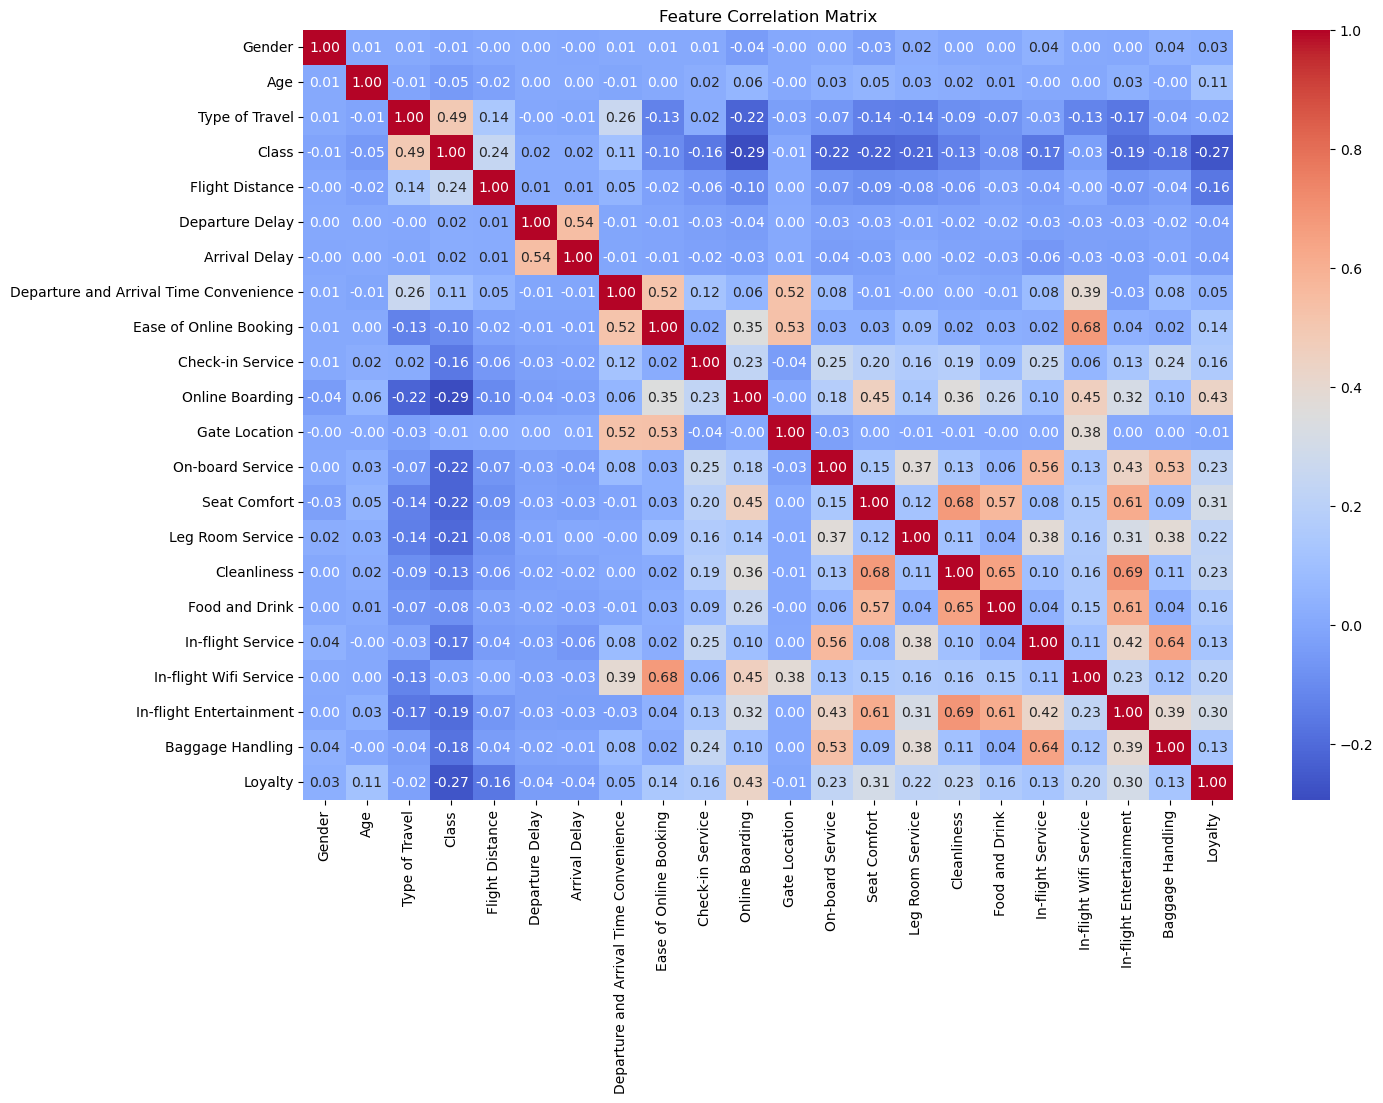

In [17]:
print("Data types of each column:\n", data.dtypes)

# 2. Select only numeric columns
numeric_data = data

# 3. Calculate and plot the correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [18]:
#from sklearn.preprocessing import StandardScaler

# Scale numerical columns
#numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
#scaler = StandardScaler()
#data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Verify scaling
#data.describe()

In [19]:
data.head()


# Recalculate the correlation matrix
corr_matrix = data.corr()

# Get the correlation of all features with 'Loyalty'
loyalty_correlations = corr_matrix["Loyalty"]

# Convert all correlations to absolute values (making negative correlations positive)
loyalty_correlations = loyalty_correlations.abs()

# Sort the correlations in descending order
sorted_loyalty_correlations = loyalty_correlations.sort_values(ascending=False)

# Print the sorted positive correlations
print(sorted_loyalty_correlations)


Loyalty                                   1.000000
Online Boarding                           0.433505
Seat Comfort                              0.305828
In-flight Entertainment                   0.304616
Class                                     0.266307
On-board Service                          0.229805
Cleanliness                               0.227971
Leg Room Service                          0.218429
In-flight Wifi Service                    0.203990
Flight Distance                           0.163602
Food and Drink                            0.158994
Check-in Service                          0.157433
Ease of Online Booking                    0.143225
Baggage Handling                          0.127392
In-flight Service                         0.126431
Age                                       0.112592
Departure and Arrival Time Convenience    0.048320
Arrival Delay                             0.038596
Departure Delay                           0.037123
Gender                         

In [20]:
data['Comfort'] = ( data['Seat Comfort'] + data['Leg Room Service'] + data['Cleanliness'] + data['In-flight Entertainment'] + data['Ease of Online Booking']) / 3
data['Onboarding Convenience'] = (  data['Ease of Online Booking'] + data['Check-in Service'] + data['Online Boarding'] + data['On-board Service'] +  data['Seat Comfort'] + data['Leg Room Service'] + data['Cleanliness'] + data['In-flight Entertainment'] + data['Ease of Online Booking']) / 3
data['Total Delay'] = data['Departure Delay'] + data['Arrival Delay']
data['Total Comfort'] = ( data['Seat Comfort'] + data['Leg Room Service'] + data['Cleanliness'] + data['In-flight Entertainment']  + data['Ease of Online Booking']) 
data['Total Onboarding Convenience'] = (  data['Ease of Online Booking'] + data['Check-in Service'] + data['Online Boarding'] + data['On-board Service'] +  data['Seat Comfort'] + data['Leg Room Service'] + data['Cleanliness'] + data['In-flight Entertainment'] + data['Ease of Online Booking'])


survey_columns = [
    'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 
    'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 
    'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling'
]
data['Total Survey Score'] = data[survey_columns].sum(axis=1)

# Recalculate the correlation matrix
corr_matrix = data.corr()

# Get the correlation of all features with 'Loyalty'
loyalty_correlations = corr_matrix["Loyalty"]

# Convert all correlations to absolute values (making negative correlations positive)
loyalty_correlations = loyalty_correlations.abs()

# Sort the correlations in descending order
sorted_loyalty_correlations = loyalty_correlations.sort_values(ascending=False)

# Print the sorted positive correlations
print(sorted_loyalty_correlations)



Loyalty                                   1.000000
Online Boarding                           0.433505
Total Onboarding Convenience              0.426128
Onboarding Convenience                    0.426128
Total Survey Score                        0.374840
Comfort                                   0.372408
Total Comfort                             0.372408
Seat Comfort                              0.305828
In-flight Entertainment                   0.304616
Class                                     0.266307
On-board Service                          0.229805
Cleanliness                               0.227971
Leg Room Service                          0.218429
In-flight Wifi Service                    0.203990
Flight Distance                           0.163602
Food and Drink                            0.158994
Check-in Service                          0.157433
Ease of Online Booking                    0.143225
Baggage Handling                          0.127392
In-flight Service              

In [21]:
data.head()

df = pd.DataFrame(data)

# List of columns to convert to integers
columns_to_convert = ['Gender','Type of Travel','Class']

# Convert specified columns to integers
for column in columns_to_convert:
    data[column] = df[column].astype(int)

# Check the updated DataFrame
print(data.dtypes)

Gender                                      int64
Age                                         int32
Type of Travel                              int64
Class                                       int64
Flight Distance                             int32
Departure Delay                             int32
Arrival Delay                               int32
Departure and Arrival Time Convenience    float64
Ease of Online Booking                    float64
Check-in Service                          float64
Online Boarding                           float64
Gate Location                             float64
On-board Service                          float64
Seat Comfort                              float64
Leg Room Service                          float64
Cleanliness                               float64
Food and Drink                            float64
In-flight Service                         float64
In-flight Wifi Service                    float64
In-flight Entertainment                   float64


In [22]:
import pandas as pd
import numpy as np
from itertools import combinations

# Separate target column and drop it from the feature set
target = data['Loyalty']
X = data.drop(columns=['Loyalty'])

# Identify numeric features
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

# List to hold interaction features
interaction_features_list = []

# Create interaction terms
for feature1, feature2 in combinations(numeric_features, 2):
    interaction_feature = X[feature1] * X[feature2]
    interaction_feature_name = f'{feature1}_x_{feature2}'
    interaction_features_list.append(interaction_feature.rename(interaction_feature_name))

# Combine original features with interaction features
interaction_features = pd.concat(interaction_features_list, axis=1)
X_with_interactions = pd.concat([X, interaction_features], axis=1)

# Add the target column back to the DataFrame
X_with_interactions['Loyalty'] = target

# Display the DataFrame with interaction features
print("DataFrame with Interaction Features:")
print(X_with_interactions)

# Evaluate correlations with target variable
correlation_matrix = X_with_interactions.corr()
print("\nCorrelation with Loyalty:")
print(correlation_matrix['Loyalty'].sort_values(ascending=False))

DataFrame with Interaction Features:
        Gender  Age  Type of Travel  Class  Flight Distance  Departure Delay  \
0            1    7               0      0                1                0   
1            0    6               0      0                1                0   
2            1    2               0      0                1                0   
3            1    7               0      0                0                0   
4            0    7               0      0                2                0   
...        ...  ...             ...    ...              ...              ...   
129875       1    4               1      2                3                0   
129876       1    2               1      2                3                0   
129877       1    9               1      2                3                0   
129878       1    7               1      2                3                3   
129879       0    1               1      2                3                0   

  

In [23]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_cleaned = data.drop(columns=['Loyalty'])
y_cleaned = data['Loyalty']

# Backward Elimination Function with Multicollinearity Check
def backward_elimination(X, y, significance_level=0.01):
    X_with_constant = sm.add_constant(X)
    model = sm.OLS(y, X_with_constant).fit()
    
    while True:
        # Check p-values
        p_values = model.pvalues[1:]  # Exclude constant
        max_p_value = p_values.max()
        
        # If p-value is too high, remove the feature with highest p-value
        if max_p_value > significance_level:
            feature_to_remove = p_values.idxmax()
            X = X.drop(columns=[feature_to_remove])
            X_with_constant = sm.add_constant(X)
            model = sm.OLS(y, X_with_constant).fit()
        else:
            break

    return X.columns.tolist(), model

# Run backward elimination
selected_features_backward, final_model = backward_elimination(X_cleaned, y_cleaned)
print("Selected features using Backward Elimination:", selected_features_backward, final_model)

# Optional: Check for Multicollinearity in Selected Features
def check_multicollinearity(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_result = check_multicollinearity(X_cleaned[selected_features_backward])
print("VIF for selected features:\n", vif_result)

Selected features using Backward Elimination: ['Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Comfort', 'Onboarding Convenience', 'Total Delay', 'Total Comfort', 'Total Onboarding Convenience', 'Total Survey Score'] <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x37aa5a570>
VIF for selected features:
                                    feature           VIF
0                                   Gender  1.947622e+00
1                                      Age  3.095234e+00
2                           Type of Travel  2.262057e+00
3                                    Class  2.677990e+00
4                         

In [24]:
def reduce_multicollinearity(X, threshold=10.0):
    while True:
        vif = pd.DataFrame()
        vif["feature"] = X.columns
        vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        
        # Identify the feature with the highest VIF above the threshold
        max_vif = vif["VIF"].max()
        if max_vif > threshold:
            feature_to_drop = vif.loc[vif["VIF"].idxmax(), "feature"]
            print(f"Dropping {feature_to_drop} with VIF={max_vif}")
            X = X.drop(columns=[feature_to_drop])
        else:
            break
    
    return X

# Reduce multicollinearity in selected features
X_reduced = reduce_multicollinearity(X_cleaned[selected_features_backward])

# Run backward elimination on reduced set of features
selected_features_reduced, final_model_reduced = backward_elimination(X_reduced, y_cleaned)
print("Selected features after VIF reduction and Backward Elimination:", selected_features_reduced)

Dropping Departure Delay with VIF=10375415698.290222
Dropping Seat Comfort with VIF=38457343.33105217
Dropping Ease of Online Booking with VIF=157043246.97402894
Dropping Total Onboarding Convenience with VIF=483189500.2267562
Dropping In-flight Wifi Service with VIF=36902075.93712614


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping Comfort with VIF=inf
Dropping Total Survey Score with VIF=3158.218704580636
Dropping Onboarding Convenience with VIF=2048.269883611816
Dropping Total Comfort with VIF=204.42653728506596
Dropping In-flight Entertainment with VIF=25.579007357466637
Dropping In-flight Service with VIF=20.90826366798095
Dropping Baggage Handling with VIF=15.253561466765087
Dropping Cleanliness with VIF=13.740650391429282
Dropping Departure and Arrival Time Convenience with VIF=10.290817113852443
Selected features after VIF reduction and Backward Elimination: ['Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Check-in Service', 'Online Boarding', 'On-board Service', 'Leg Room Service', 'Food and Drink', 'Total Delay']


In [25]:

# Recalculate the correlation matrix
corr_matrix = data.corr()

# Get the correlation of all features with 'Loyalty'
loyalty_correlations = corr_matrix["Loyalty"]

# Convert all correlations to absolute values (making negative correlations positive)
loyalty_correlations = loyalty_correlations.abs()

# Sort the correlations in descending order
sorted_loyalty_correlations = loyalty_correlations.sort_values(ascending=False)

# Print the sorted positive correlations
print(sorted_loyalty_correlations)


Loyalty                                   1.000000
Online Boarding                           0.433505
Total Onboarding Convenience              0.426128
Onboarding Convenience                    0.426128
Total Survey Score                        0.374840
Comfort                                   0.372408
Total Comfort                             0.372408
Seat Comfort                              0.305828
In-flight Entertainment                   0.304616
Class                                     0.266307
On-board Service                          0.229805
Cleanliness                               0.227971
Leg Room Service                          0.218429
In-flight Wifi Service                    0.203990
Flight Distance                           0.163602
Food and Drink                            0.158994
Check-in Service                          0.157433
Ease of Online Booking                    0.143225
Baggage Handling                          0.127392
In-flight Service              

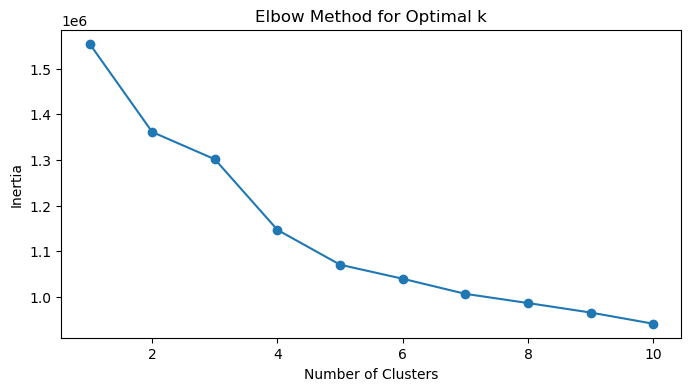

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Standardize the Data (assuming X_reduced from previous steps)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

# Step 2: Determine Optimal Number of Clusters
# Using the Elbow Method
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Using the Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot the Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

# Step 3: Fit K-Means with the chosen number of clusters (choose based on elbow or silhouette score)
optimal_k = 4  # Replace this with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X_reduced['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Analyze Cluster Profiles
cluster_profiles = X_reduced.groupby('Cluster').mean()
print("Cluster Profiles:\n", cluster_profiles)

# Step 5: Add Clustering Results to the Data
data['Cluster'] = X_reduced['Cluster']  # Adding cluster labels to the original data for further analysis

# Optional: Visualize clustering results if using PCA or TSNE for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_reduced['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Visualization with PCA')
plt.colorbar(label='Cluster')
plt.show()